# Example: Athletes Dataset

## 1. Import libraries and the dataset

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from packages import datasetAuxiliarFunctions as daux

In [2]:
athletesDataset=pd.read_csv("../../datasets/athlete_events.csv")
athletesDataset.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## 2. Inspect data Structure and check missing values

In [3]:
athletesDataset.info()
print("\n",athletesDataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB

 ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season 

### Remove unwanted columns: ID, Name, Team, NOC, Games, City, Event and Sport

In [4]:
listColumns=["ID","Name", "Team","NOC", "Games", "City", "Event", "Sport"]

for column in listColumns:
    athletesDataset.drop(column, axis=1, inplace=True)

athletesDataset.head()

,Sex,Age,Height,Weight,Year,Season,Medal
0,M,24.0,180.0,80.0,1992,Summer,NaN
1,M,23.0,170.0,60.0,2012,Summer,NaN
2,M,24.0,NaN,NaN,1920,Summer,NaN
3,M,34.0,NaN,NaN,1900,Summer,Gold
4,F,21.0,185.0,82.0,1988,Winter,NaN


### Convert the data type of the columns Sex, Season, and Medal to numeric format

In [5]:
# Column Sex
# Converts the string M and F into numbers. { "F":0, "M":1 }
listSex=set(athletesDataset["Sex"])
print(listSex)
athletesDataset["Sex"]=athletesDataset["Sex"].map({"F":0, "M":1})
athletesDataset.head()


{'M', 'F'}


,Sex,Age,Height,Weight,Year,Season,Medal
0,1,24.0,180.0,80.0,1992,Summer,NaN
1,1,23.0,170.0,60.0,2012,Summer,NaN
2,1,24.0,NaN,NaN,1920,Summer,NaN
3,1,34.0,NaN,NaN,1900,Summer,Gold
4,0,21.0,185.0,82.0,1988,Winter,NaN


In [6]:
# Column Season
# Converts the Season into numbers. { "Summer":0, "Winter":1 }
listSeason=set(athletesDataset["Season"])
print(listSeason)
athletesDataset["Season"]=athletesDataset["Season"].map({"Summer":0, "Winter":1})
athletesDataset.head()


{'Summer', 'Winter'}


,Sex,Age,Height,Weight,Year,Season,Medal
0,1,24.0,180.0,80.0,1992,0,NaN
1,1,23.0,170.0,60.0,2012,0,NaN
2,1,24.0,NaN,NaN,1920,0,NaN
3,1,34.0,NaN,NaN,1900,0,Gold
4,0,21.0,185.0,82.0,1988,1,NaN


In [7]:
# Column Medal
# Converts the Medal into numbers. { "Bronze":0, "Silver":1,"Gold":2 }
listMedal=set(athletesDataset["Medal"])
print(listMedal)
athletesDataset["Medal"]=athletesDataset["Medal"].map({"Bronze":0, "Silver":1,"Gold":2})
athletesDataset.head(10)

{'Gold', 'Bronze', nan, 'Silver'}


,Sex,Age,Height,Weight,Year,Season,Medal
0,1,24.0,180.0,80.0,1992,0,NaN
1,1,23.0,170.0,60.0,2012,0,NaN
2,1,24.0,NaN,NaN,1920,0,NaN
3,1,34.0,NaN,NaN,1900,0,2.0
4,0,21.0,185.0,82.0,1988,1,NaN
5,0,21.0,185.0,82.0,1988,1,NaN
6,0,25.0,185.0,82.0,1992,1,NaN
7,0,25.0,185.0,82.0,1992,1,NaN
8,0,27.0,185.0,82.0,1994,1,NaN
9,0,27.0,185.0,82.0,1994,1,NaN


### Remove or Fill the null values of each column 

In [ ]:
# Fill the NaN values of Medal column with the mean of the medal
athletesDataset=daux.fillColumnMean(athletesDataset,"Medal")
athletesDataset.head(10)


,Sex,Age,Height,Weight,Year,Season,Medal
0,1,24.0,180.0,80.0,1992,0,1.0
1,1,23.0,170.0,60.0,2012,0,1.0
2,1,24.0,NaN,NaN,1920,0,1.0
3,1,34.0,NaN,NaN,1900,0,2.0
4,0,21.0,185.0,82.0,1988,1,1.0
5,0,21.0,185.0,82.0,1988,1,1.0
6,0,25.0,185.0,82.0,1992,1,1.0
7,0,25.0,185.0,82.0,1992,1,1.0
8,0,27.0,185.0,82.0,1994,1,1.0
9,0,27.0,185.0,82.0,1994,1,1.0


In [ ]:
# Fill the NaN values of Age column with the mean of the Age
athletesDataset=daux.fillColumnMean(athletesDataset,"Age")
athletesDataset.head(10)

'print(athletesDataset["Age"].isnull().sum())\nathletesDataset=daux.removeNullValues(athletesDataset,"Age")\nprint(athletesDataset["Age"].isnull().sum())'

In [15]:
# Fill the NaN values of Height column with the mean of the Height
athletesDataset=daux.fillColumnMean(athletesDataset,"Height")
athletesDataset.head(10)

,Sex,Age,Height,Weight,Year,Season,Medal
0,1,24.0,180.0,80.0,1992,0,1.0
1,1,23.0,170.0,60.0,2012,0,1.0
2,1,24.0,175.0,70.0,1920,0,1.0
3,1,34.0,175.0,70.0,1900,0,2.0
4,0,21.0,185.0,82.0,1988,1,1.0
5,0,21.0,185.0,82.0,1988,1,1.0
6,0,25.0,185.0,82.0,1992,1,1.0
7,0,25.0,185.0,82.0,1992,1,1.0
8,0,27.0,185.0,82.0,1994,1,1.0
9,0,27.0,185.0,82.0,1994,1,1.0


In [12]:
# Fill the NaN values of Weight column with the mean of the Weight
athletesDataset=daux.fillColumnMean(athletesDataset,"Weight")
athletesDataset.head(10)


,Sex,Age,Height,Weight,Year,Season,Medal
0,1,24.0,180.0,80.0,1992,0,1.0
1,1,23.0,170.0,60.0,2012,0,1.0
2,1,24.0,NaN,70.0,1920,0,1.0
3,1,34.0,NaN,70.0,1900,0,2.0
4,0,21.0,185.0,82.0,1988,1,1.0
5,0,21.0,185.0,82.0,1988,1,1.0
6,0,25.0,185.0,82.0,1992,1,1.0
7,0,25.0,185.0,82.0,1992,1,1.0
8,0,27.0,185.0,82.0,1994,1,1.0
9,0,27.0,185.0,82.0,1994,1,1.0


In [17]:
# Verify if there are null values
athletesDataset.isnull().sum()

Sex       0
Age       0
Height    0
Weight    0
Year      0
Season    0
Medal     0
dtype: int64

In [ ]:
# Remove the Null values of the column Height
""""print(athletesDataset["Height"].isnull().sum())
athletesDataset=daux.removeNullValues(athletesDataset,"Height")
print(athletesDataset["Height"].isnull().sum())"""

In [19]:
athletesDataset.head(40)

,Sex,Age,Height,Weight,Year,Season,Medal
0,1,24.0,180.0,80.0,1992,0,1.0
1,1,23.0,170.0,60.0,2012,0,1.0
4,0,21.0,185.0,82.0,1988,1,1.0
5,0,21.0,185.0,82.0,1988,1,1.0
6,0,25.0,185.0,82.0,1992,1,1.0
7,0,25.0,185.0,82.0,1992,1,1.0
8,0,27.0,185.0,82.0,1994,1,1.0
9,0,27.0,185.0,82.0,1994,1,1.0
10,1,31.0,188.0,75.0,1992,1,1.0
11,1,31.0,188.0,75.0,1992,1,1.0


# 3. Statistical summary and visualizing outliers for the columns age, weight, height and year

In [20]:
athletesDataset.describe()

,Sex,Age,Height,Weight,Year,Season,Medal
count,271116.000000,271116.000000,271116.00000,271116.000000,271116.000000,271116.000000,271116.000000
mean,0.725129,25.537438,175.26374,70.539500,1978.378480,0.179126,1.000284
std,0.446450,6.281690,9.27917,12.578184,29.877632,0.383459,0.313625
min,0.000000,10.000000,127.00000,25.000000,1896.000000,0.000000,0.000000
25%,0.000000,22.000000,170.00000,63.000000,1960.000000,0.000000,1.000000
50%,1.000000,25.000000,175.00000,70.000000,1988.000000,0.000000,1.000000
75%,1.000000,28.000000,180.00000,75.000000,2002.000000,0.000000,1.000000
max,1.000000,97.000000,226.00000,214.000000,2016.000000,1.000000,2.000000


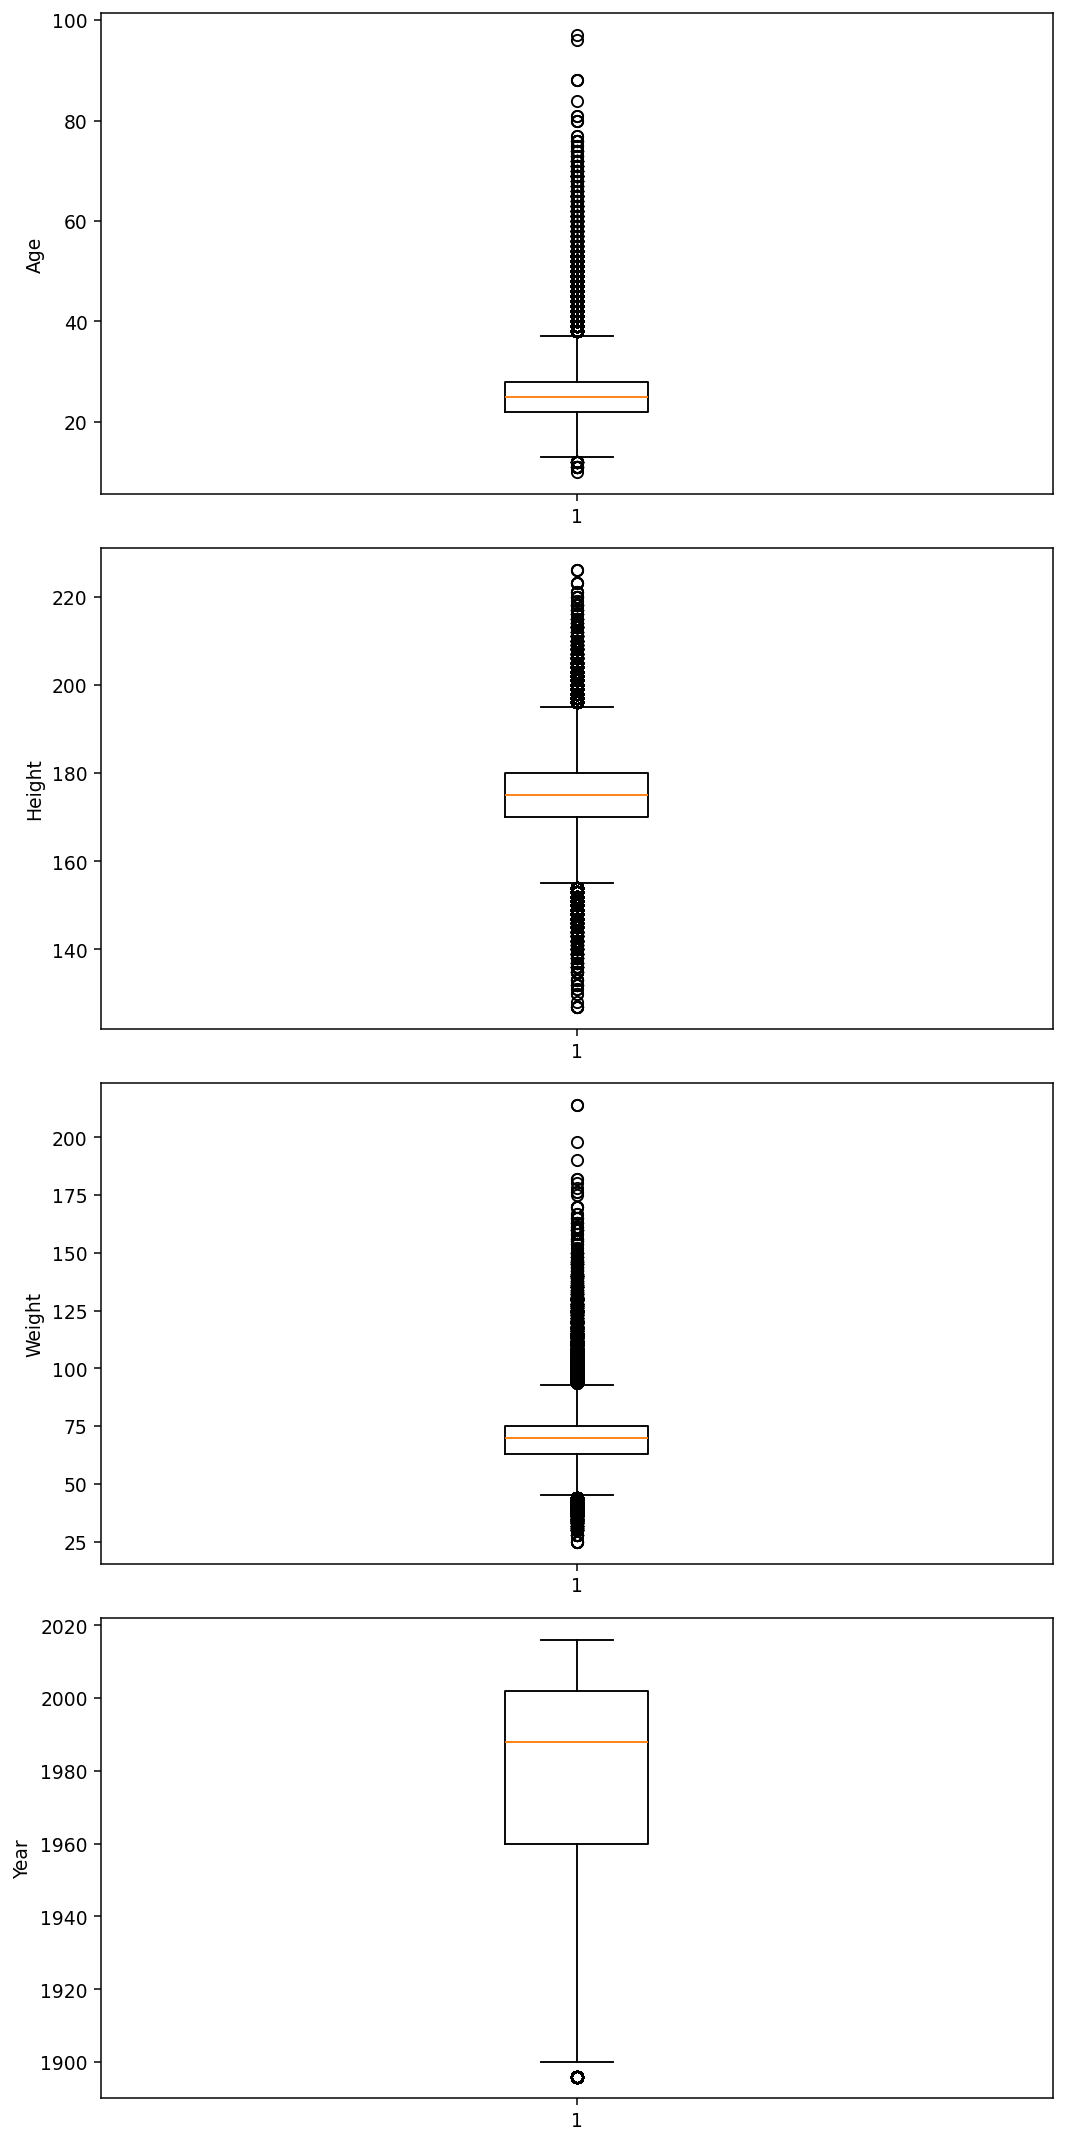

In [21]:
fig, subBoxes=plt.subplots(4,1,figsize=(8,16), dpi=135)
columns=["Age","Height","Weight", "Year"]

for column in columns:
    i=columns.index(column)
    subBoxes[i].boxplot(athletesDataset[column])
    subBoxes[i].set_ylabel(column)
    
plt.tight_layout()
plt.show()

## 4. Remove Outliers using the Interquartile Range (IQR) Method

Remove Extreme values beyonde a reasonable range to improve model robustness.

IQR = Q3 (75th percentile) - Q1 (25th percentile)

lower (Min) = Q1 - 1.5 * IQR

upper (Max) = Q3 + 1.5 * IQR

Values below lower or above upper are outliers;
Calculate lower and upper bounds for each column separately;
Filter data points to keep onlythose withn bounds

 Q1 and Q3 = 22.0 : 28.0
Lower and upper = 13.0 : 37.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1fb7687ae90>,
 'caps': [<matplotlib.lines.Line2D at 0x1fb7687b110>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fb7687ad50>],
 'medians': [<matplotlib.lines.Line2D at 0x1fb7687b390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fb7687b4d0>],
 'means': []}

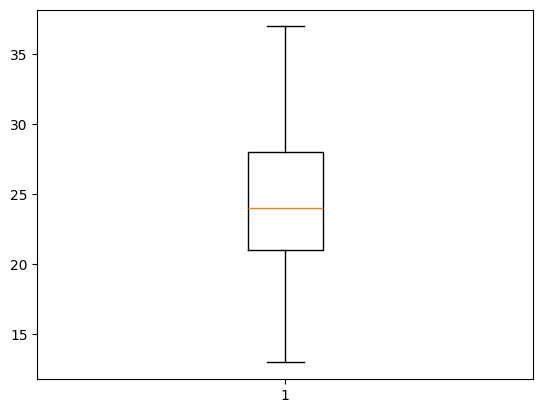

In [ ]:
# Column Age
athletesDataset=daux.removeOutliers(athletesDataset,"Age")
plt.boxplot(athletesDataset["Age"])
plt.show()

In [24]:
athletesDataset

,Sex,Age,Height,Weight,Year,Season,Medal
0,1,24.0,180.0,80.0,1992,0,1.0
1,1,23.0,170.0,60.0,2012,0,1.0
2,1,24.0,175.0,70.0,1920,0,1.0
3,1,34.0,175.0,70.0,1900,0,2.0
4,0,21.0,185.0,82.0,1988,1,1.0
...,...,...,...,...,...,...,...
271111,1,29.0,179.0,89.0,1976,1,1.0
271112,1,27.0,176.0,59.0,2014,1,1.0
271113,1,27.0,176.0,59.0,2014,1,1.0
271114,1,30.0,185.0,96.0,1998,1,1.0


 Q1 and Q3 = 170.0 : 180.0
Lower and upper = 155.0 : 195.0


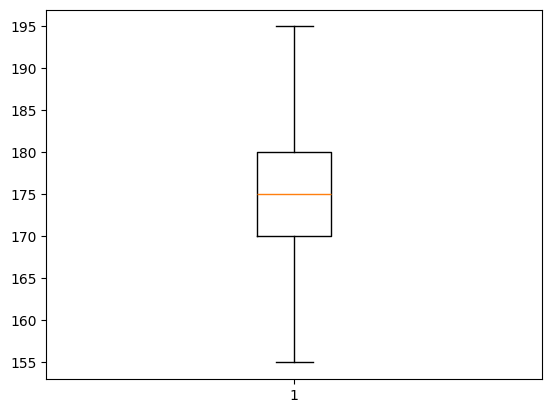

In [ ]:
# Column Height
athletesDataset=daux.removeOutliers(athletesDataset,"Height")
plt.boxplot(athletesDataset["Height"])
plt.show()

In [28]:
athletesDataset

,Sex,Age,Height,Weight,Year,Season,Medal
0,1,24.0,180.0,80.0,1992,0,1.0
1,1,23.0,170.0,60.0,2012,0,1.0
2,1,24.0,175.0,70.0,1920,0,1.0
3,1,34.0,175.0,70.0,1900,0,2.0
4,0,21.0,185.0,82.0,1988,1,1.0
...,...,...,...,...,...,...,...
271111,1,29.0,179.0,89.0,1976,1,1.0
271112,1,27.0,176.0,59.0,2014,1,1.0
271113,1,27.0,176.0,59.0,2014,1,1.0
271114,1,30.0,185.0,96.0,1998,1,1.0


 Q1 and Q3 = 63.0 : 74.0
Lower and upper = 46.5 : 90.5


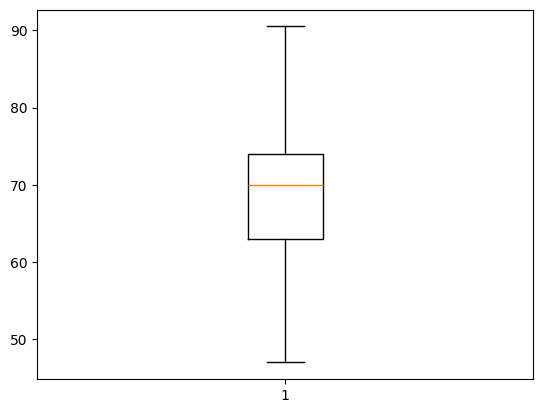

In [32]:
# Column Weight
athletesDataset=daux.removeOutliers(athletesDataset,"Weight")
plt.boxplot(athletesDataset["Weight"])
plt.show()

In [33]:
athletesDataset

,Sex,Age,Height,Weight,Year,Season,Medal
0,1,24.0,180.0,80.0,1992,0,1.0
1,1,23.0,170.0,60.0,2012,0,1.0
2,1,24.0,175.0,70.0,1920,0,1.0
3,1,34.0,175.0,70.0,1900,0,2.0
4,0,21.0,185.0,82.0,1988,1,1.0
...,...,...,...,...,...,...,...
271109,1,28.0,183.0,72.0,2004,0,1.0
271110,0,33.0,171.0,69.0,2016,0,1.0
271111,1,29.0,179.0,89.0,1976,1,1.0
271112,1,27.0,176.0,59.0,2014,1,1.0


 Q1 and Q3 = 1960.0 : 2002.0
Lower and upper = 1897.0 : 2065.0


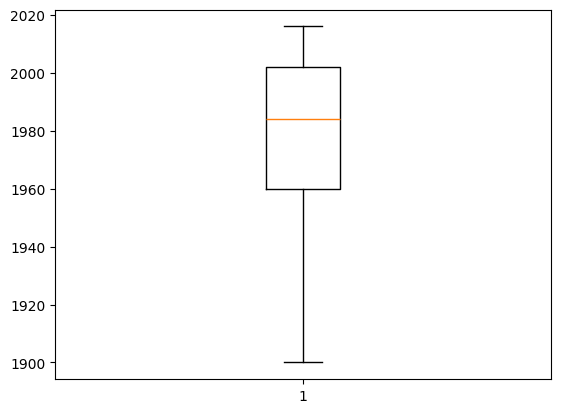

In [37]:
# Column Year
athletesDataset=daux.removeOutliers(athletesDataset,"Year")
plt.boxplot(athletesDataset["Year"])
plt.show()

In [38]:
athletesDataset

,Sex,Age,Height,Weight,Year,Season,Medal
0,1,24.0,180.0,80.0,1992,0,1.0
1,1,23.0,170.0,60.0,2012,0,1.0
2,1,24.0,175.0,70.0,1920,0,1.0
3,1,34.0,175.0,70.0,1900,0,2.0
4,0,21.0,185.0,82.0,1988,1,1.0
...,...,...,...,...,...,...,...
271109,1,28.0,183.0,72.0,2004,0,1.0
271110,0,33.0,171.0,69.0,2016,0,1.0
271111,1,29.0,179.0,89.0,1976,1,1.0
271112,1,27.0,176.0,59.0,2014,1,1.0


## 5. Correlation Analysis

Understand relationship between features and target variable (outcome).

Correlation helps gauge (medir) feature importance.

**df.corr()**: Computes pairwise correlation coefficients between columns.

Heatmap via seaborn visualizes correlation matrix clearly.

Sorting correlations with corr['Outcome'].sort_values() highlights features most correlated with the target.

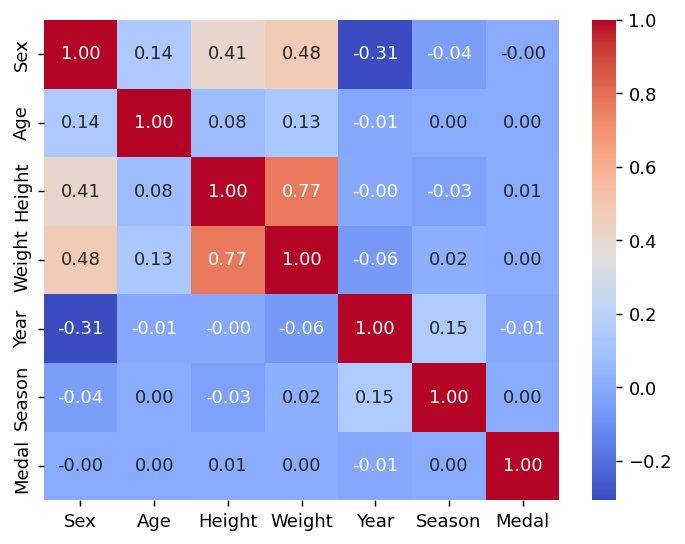

In [42]:
correlation= athletesDataset.corr()
plt.figure(dpi=130)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [45]:
#print(correlation["Outcome"].sort_values(ascending=False))


## 6. Visualize Target Variable Distribution

